## Assignment 2 - please answer the questions as thoroughly as possible, and provide detailed interpretation whenever possible

In [4]:
pwd

'/Users/batman/Downloads'

In [6]:
import pandas as pd
import numpy as np
df=pd.read_csv("banklist.csv")
df.head()
print(len(df))


555


## Question 1 (20 points)

In [ ]:
#Look at the data set: First, make sure there are no missing values in
#any of the categorical columns.If there are, replace them with
#a 'M' value. Then, consider that Acquiring Institution column is the institution that holds various banks.
#What are the top 4 acquiring institutions?$

In [64]:
print(df.notnull().sum()) #one method in addition to below for checking for missling values; null values
#notnull prints True when a value is present.   555 as seen abovr for length (Rows) shows that there is a value
#for every row.  

Bank Name                555
City                     555
ST                       555
CERT                     555
Acquiring Institution    555
Closing Date             555
Updated Date             555
dtype: int64


In [50]:
print(df.isnull().sum()) #dataset has no missing values

Bank Name                0
City                     0
ST                       0
CERT                     0
Acquiring Institution    0
Closing Date             0
Updated Date             0
dtype: int64


In [51]:
#evaluating categorical values 
df_cat = df[['Bank Name','City', 'ST', 'Acquiring Institution']]

In [52]:
#object with cat values
print(df_cat.isnull().sum())

Bank Name                0
City                     0
ST                       0
Acquiring Institution    0
dtype: int64


In [ ]:
#there are no missing values in the categorical variables. 

In [53]:
#assigning null values with M should there be any.   
#in the categorical variables. 
df_clean = df_cat.fillna('M')

In [54]:
count = df['Acquiring Institution'].value_counts()
count.sort_values(ascending=False).iloc[0:4] #will print the top 4 inst's
#the Top 4 acquiring institutions are listed below:

No Acquirer                            31
State Bank and Trust Company           12
First-Citizens Bank & Trust Company    11
Ameris Bank                            10
Name: Acquiring Institution, dtype: int64

In [ ]:
#How many city names start with the letter 'A' and how many don't? Use the str vectorized series attribute

In [56]:
city_ct = df_clean["City"]
count_A = city_ct.str.startswith("A")
count_A.sum()
#There are 34 cities that begin with A.  Answer is below:

34

In [16]:
count_no = len(df)
a= count_no - 34 #minus known amount of cities beginning with A 
print(a)
#By evaluating the total amount of cities within the column and knowing how many start with A; only need
#to substract the known amount from total.  Cities that do not begin with A are 521 as stated below:

521


In [ ]:
#What are the cities whose names consist of 2 words and how many are there?

In [58]:
cities_2 = city_ct.str.contains(' ')
cities_2.sum()
#there are 138 cities whose names consiste of 2 words  

138

In [311]:
cities_index = city_ct[cities_2] 
cities_index.value_counts()[:5] 

Los Angeles    4
Las Vegas      4
Boca Raton     2
Kansas City    2
St. Louis      2
Name: City, dtype: int64

## Question 2 (50 points)

In [ ]:
#use various apply and group by methods studied in class to obtain the city for each state corresponding to the smallest
#number of certificates (CERT column). Then, display only the city, state combinations along with the number of certificates
#(data frame with 3 columns) for which the Acquiring Institution contains 3 words (for this exercise, you can count symbols
#like & and others as words for each Acquiring Institution)

In [67]:
df.groupby(['ST','City'])["CERT"].min()

ST  City        
AL  Birmingham      17750
    Fort Deposit    24957
    Irondale        32276
    Montgomery       9609
    Sylacauga       35224
                    ...  
WI  Stoughton        5328
    Wausau          35016
    West Allis      28612
WV  Northfork        6782
WY  Thermopolis     22754
Name: CERT, Length: 436, dtype: int64

In [71]:
df.groupby(['ST', "City"]).agg({"CERT":[min]}) 

CERT
                   min
ST City               
AL Birmingham    17750
   Fort Deposit  24957
   Irondale      32276
   Montgomery     9609
   Sylacauga     35224
...                ...
WI Stoughton      5328
   Wausau        35016
   West Allis    28612
WV Northfork      6782
WY Thermopolis   22754

[436 rows x 1 columns]

In [75]:
sort_city = df.sort_values('City')
print(sort_city.groupby(['ST','City'])["CERT"].min())


ST  City        
AL  Birmingham      17750
    Fort Deposit    24957
    Irondale        32276
    Montgomery       9609
    Sylacauga       35224
                    ...  
WI  Stoughton        5328
    Wausau          35016
    West Allis      28612
WV  Northfork        6782
WY  Thermopolis     22754
Name: CERT, Length: 436, dtype: int64


In [130]:
wordcount = df['Acquiring Institution'].str.count(" ")
wordcount = pd.DataFrame(wordcount)


In [152]:
wordcount.rename(columns={"Acquiring Institution" : 'Word Count'},inplace=True)

In [153]:
newDf = pd.concat([df, wordcount], axis = 1)
newDf.head(n=5)  #evaluating data--column name more accurate 

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,Word Count
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,21-Feb-18,2
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,21-Feb-18,1
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17,3
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17,4
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17,1


In [154]:
len(newDf.columns)

8

In [155]:
word_3 = pd.DataFrame(newDf, columns=['City', 'ST', 'CERT', 'Acquiring Institution','Word Count' ])  #new df
word_3.head(n=5)

,City,ST,CERT,Acquiring Institution,Word Count
0,Chicago,IL,30570,Royal Savings Bank,2
1,Argonia,KS,17719,Conway Bank,1
2,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",3
3,Milwaukee,WI,30003,First-Citizens Bank & Trust Company,4
4,New Orleans,LA,58302,Whitney Bank,1


In [156]:
W3 = word_3.loc[word_3['Word Count']==2] 
W3.head(n=5)  # notice output below.  word count has to be set to 2 in order to equal 3 words because of 
#how data is counted/stored in Python.  
#Output is of those with ONLY three words under Acquiring Institution.  

,City,ST,CERT,Acquiring Institution,Word Count
0,Chicago,IL,30570,Royal Savings Bank,2
5,Cottonwood Heights,UT,35495,Cache Valley Bank,2
13,Longview,WA,35156,Twin City Bank,2
20,Crestview,FL,17557,First NBC Bank,2
25,Chicago,IL,28462,"Providence Bank, LLC",2


In [157]:
W3[["City", "ST", "CERT"]]   #selecting city, st, and cert attached to 3 words but leaving out word count. 

,City,ST,CERT
0,Chicago,IL,30570
5,Cottonwood Heights,UT,35495
13,Longview,WA,35156
20,Crestview,FL,17557
25,Chicago,IL,28462
...,...,...,...
541,Chicago,IL,29355
542,Stamford,CT,19183
544,Boca Raton,FL,26652
550,Hinsdale,IL,32646


## Question 3 (30 points)

In [ ]:
#finally, let us obtain a distribution of CERT column across all records. Then, let us subset the original data frame to 
#only consider records for which CERT is smaller than 10th percentile of the total. Then, for these records, use pivot table
#method to obtain the min, max, and average CERT for each ST combination for which the number of records is 
#more than 1. We will have index for 
#state, and then 4 columns: ST,min_CERT, max_CERT, mean_CERT for CERT (make sure
#you do not have a multi-level data frame! Finally, display a bar plot for the first 3 states in the resulting
#data frame: each of the 3 states will be on x axis, and the corresponding 3 summary statistics will be the 3 bars - stacked
#bar plot.

In [263]:
import matplotlib

In [264]:
cert_10 = df['CERT'].describe(percentiles=[.1]) #inspecting 10 percent of data

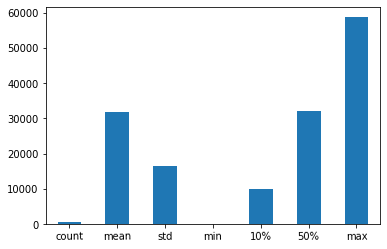

In [265]:
cert_10.plot(kind='bar',rot=True) #plotting data to see percentiles

In [284]:
cert_10 = df['CERT'].quantile(.1)

In [285]:
dfcert = df[df['CERT'] < cert_10] # isolating less than 10 percent 

In [287]:
df.quantile(.1) # checking actual number 


CERT    10091.6
Name: 0.1, dtype: float64

In [288]:
dfcert.head(n=5) #ensuring data looks sufficient to our task 

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
8,Allied Bank,Mulberry,AR,91,Today's Bank,23-Sep-16,25-Sep-17
11,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,29-Apr-16,6-Sep-16
23,The National Republic Bank of Chicago,Chicago,IL,916,State Bank of Texas,24-Oct-14,6-Jan-16
24,NBRS Financial,Rising Sun,MD,4862,Howard Bank,17-Oct-14,19-Feb-18


In [289]:
dfcert.shape  #checking rows, columns

(56, 7)

In [312]:
dfcert2 = dfcert.groupby('ST')['CERT'].agg(['min', 'max', 'mean']) #using groupby function to obtain requested 
#quantitative measures 

In [291]:
dfcert2.head(n=10) #inspecting data results < 10 percent 

,min,max,mean
ST,,,
AL,9609,9609,9609.000000
AR,91,91,91.000000
CO,2994,2994,2994.000000
FL,5672,9619,7645.500000
GA,151,10054,4625.857143
IL,916,10086,5583.750000
IN,4392,4392,4392.000000
KS,1361,4754,4040.800000
MD,4862,4862,4862.000000


In [292]:
dfcert.groupby('ST')['CERT'].mean().min

<bound method Series.min of ST
AL    9609.000000
AR      91.000000
CO    2994.000000
FL    7645.500000
GA    4625.857143
IL    5583.750000
IN    4392.000000
KS    4040.800000
MD    4862.000000
MI    1006.000000
MN    6624.666667
MO    4889.500000
NE    5431.000000
OH    7797.500000
OK    4167.250000
TN    7202.333333
TX    3287.000000
UT    1250.500000
WA     513.000000
WI    5307.500000
WV    6782.000000
Name: CERT, dtype: float64>

In [294]:
dfcert.groupby('ST')['CERT'].agg('mean')  #using agg function in pandas to take mean of rows; alternative method

ST
AL    9609.000000
AR      91.000000
CO    2994.000000
FL    7645.500000
GA    4625.857143
IL    5583.750000
IN    4392.000000
KS    4040.800000
MD    4862.000000
MI    1006.000000
MN    6624.666667
MO    4889.500000
NE    5431.000000
OH    7797.500000
OK    4167.250000
TN    7202.333333
TX    3287.000000
UT    1250.500000
WA     513.000000
WI    5307.500000
WV    6782.000000
Name: CERT, dtype: float64

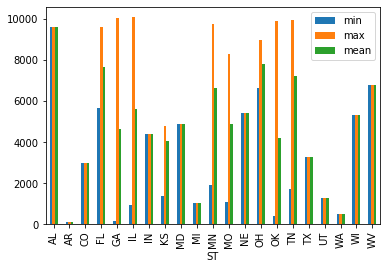

In [313]:
dfcert2.plot(kind='bar')   #plotting states vs. amount with min, mean, and max for each states.  will minimize to 
#three states below 


In [314]:
graph2 = pd.pivot_table(dfcert,index ="ST",values= "CERT", aggfunc ={np.mean,np.max,np.min})

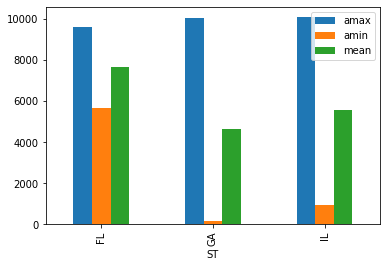

In [316]:
graph2[3:6].plot(kind= 'bar')   #plotting the three states with most with relative min, mean, and max.   